In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import snap

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
features = pd.read_csv('temp/followers_network_2.emb', sep=' ',header=None,skiprows=1)
features.head()

,0,1,2,3,4,5,6,7,8
0,222691,1.05250,-0.377990,0.617981,1.02620,0.348162,-1.69649,1.94781,-2.22666
1,222193,3.38967,-1.440430,2.028870,3.51253,1.328330,-5.33596,6.51464,-7.83266
2,222661,1.04188,-0.377522,0.603931,1.04081,0.313374,-1.78915,1.93417,-2.27099
3,222722,1.03064,-0.344882,0.613704,1.07117,0.307035,-1.77983,1.92469,-2.30728
4,222341,1.00497,-0.385710,0.589647,1.00576,0.246031,-1.62952,1.82408,-2.22424


In [3]:
nodes = pd.read_csv('data/followers_network_nodes.csv', sep='\t')
nodes.head()

c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,content,type,id_node
0,1,gxgcollective,user,2964555295
1,2,1509346839.0,post,1636842385063323219
2,3,1509326008.0,post,1636667639059249501
3,4,1509235346.0,post,1635907116583816031
4,5,1509228990.0,post,1635853795965600449


In [4]:
data = nodes.merge(features, left_on='id', right_on=0)
data.head()

,id,content,type,id_node,0,1,2,3,4,5,6,7,8
0,1,gxgcollective,user,2964555295,1,0.694117,-0.433851,-0.470545,-0.261430,0.529161,-1.617920,2.37351,-3.66403
1,2,1509346839.0,post,1636842385063323219,2,0.492867,-0.409291,-0.255596,-0.250258,0.207117,-1.185980,1.67087,-2.60868
2,3,1509326008.0,post,1636667639059249501,3,0.381286,-0.323382,-0.226575,-0.183827,-0.011145,-0.986176,1.53346,-2.31987
3,4,1509235346.0,post,1635907116583816031,4,0.440996,-0.342074,-0.188271,-0.220760,0.393994,-1.076640,1.53617,-2.17403
4,5,1509228990.0,post,1635853795965600449,5,0.390529,-0.360863,-0.357427,-0.176851,0.275160,-1.167830,1.55911,-2.40796


In [5]:
pca = PCA(n_components=2)
X_red = pca.fit_transform(data[range(1,9)])

In [6]:
sum(pca.explained_variance_ratio_)

0.41396960024412233

In [7]:
data = pd.concat([data, pd.DataFrame(X_red, columns=['r1','r2'])], axis=1)

In [8]:
data.head()

,id,content,type,id_node,0,1,2,3,4,5,6,7,8,r1,r2
0,1,gxgcollective,user,2964555295,1,0.694117,-0.433851,-0.470545,-0.261430,0.529161,-1.617920,2.37351,-3.66403,0.955607,-0.121118
1,2,1509346839.0,post,1636842385063323219,2,0.492867,-0.409291,-0.255596,-0.250258,0.207117,-1.185980,1.67087,-2.60868,-0.249746,-0.123447
2,3,1509326008.0,post,1636667639059249501,3,0.381286,-0.323382,-0.226575,-0.183827,-0.011145,-0.986176,1.53346,-2.31987,-0.609548,-0.111402
3,4,1509235346.0,post,1635907116583816031,4,0.440996,-0.342074,-0.188271,-0.220760,0.393994,-1.076640,1.53617,-2.17403,-0.565558,0.031485
4,5,1509228990.0,post,1635853795965600449,5,0.390529,-0.360863,-0.357427,-0.176851,0.275160,-1.167830,1.55911,-2.40796,-0.428863,-0.108931


In [25]:
users = data[data['type'] == 'user']
tags = data[data['type'] == 'tag']
posts = data[data['type'] == 'post']

In [10]:
def getStructuralMetrics(X, K):
    silhouette = []
    inertia = []

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=17).fit(X)
        s = silhouette_score(X, kmeans.labels_)
        i = kmeans.inertia_
        silhouette.append(s)
        inertia.append(i)
        
    return [silhouette, inertia]

In [22]:
def plotClusters(data, K, centroids, pcaComp = False):
    plt.figure(figsize=(12,12))
    for c in range(K):
        cluster = data[data['cluster'] == c]
        if pcaComp:
            plt.scatter(cluster['r1'], cluster['r2'], marker='.', label=c)
        else:
            plt.scatter(cluster[1], cluster[2], marker='.', label=c)
            plt.scatter(centroids[c][0], centroids[c][1], marker='o', color='black')
    plt.legend()

## 1. User features extraction and direct clustering

Apply usual methodology to extract communities of users, based on their feature representation in the complete network.

In [26]:
users.drop(['type',0], axis=1, inplace=True)

c:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


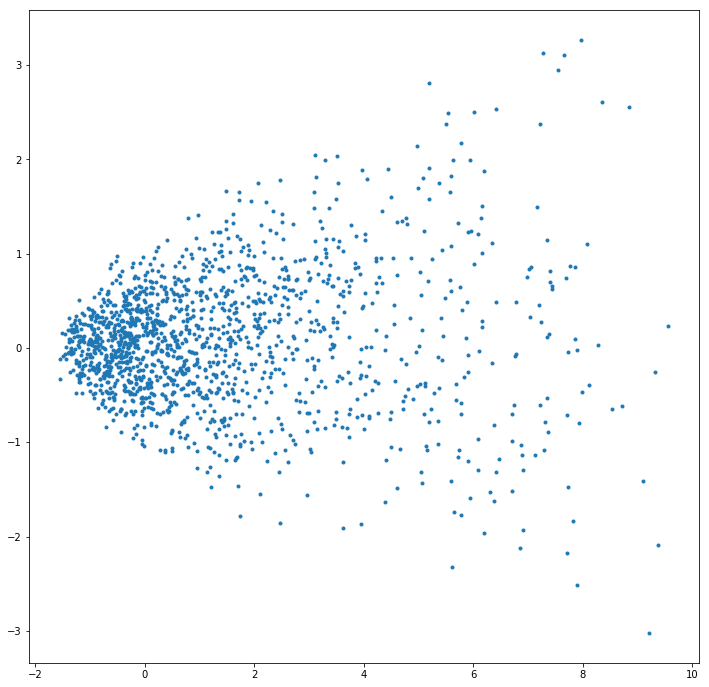

In [27]:
plt.figure(figsize=(12,12))
plt.scatter(users['r1'], users['r2'], marker='.')

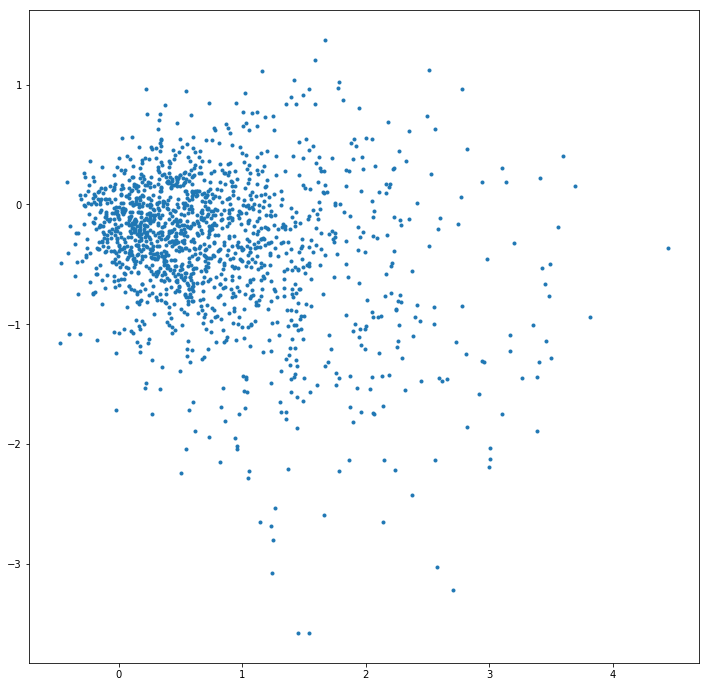

In [28]:
plt.figure(figsize=(12,12))
plt.scatter(users[1], users[2], marker='.')

In [29]:
K = range(2, 15)
s, i = getStructuralMetrics(users[range(1,9)], K)

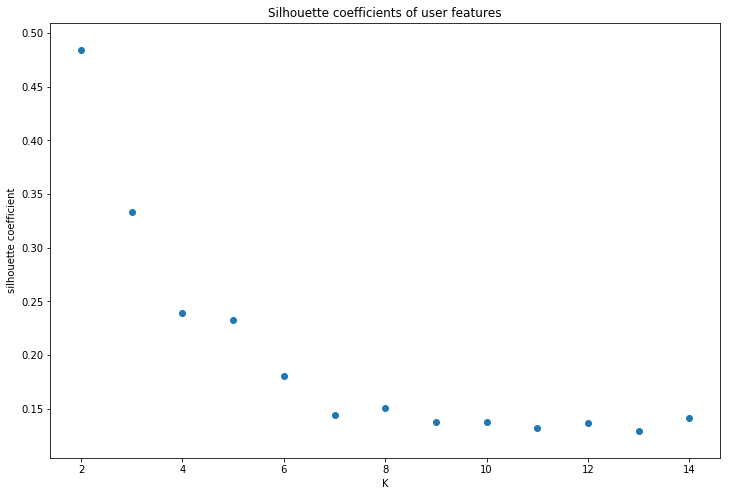

In [30]:
plt.figure(figsize=(12,8))
plt.title('Silhouette coefficients of user features')
plt.xlabel('K')
plt.ylabel('silhouette coefficient')
plt.scatter(K, s)

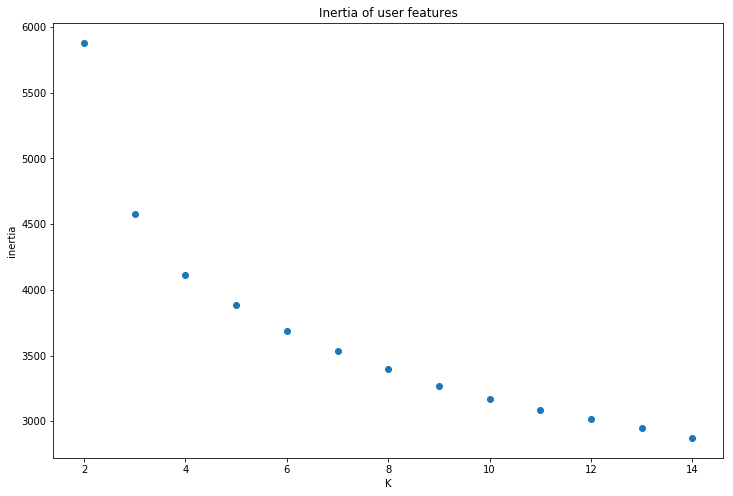

In [31]:
plt.figure(figsize=(12,8))
plt.title('Inertia of user features')
plt.xlabel('K')
plt.ylabel('inertia')
plt.scatter(K, i)

In [32]:
K_user = 7
kmeans = KMeans(n_clusters=K_user, random_state=17, n_init=15, init='random').fit(users[range(1,9)])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [33]:
users['cluster'] = labels

c:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


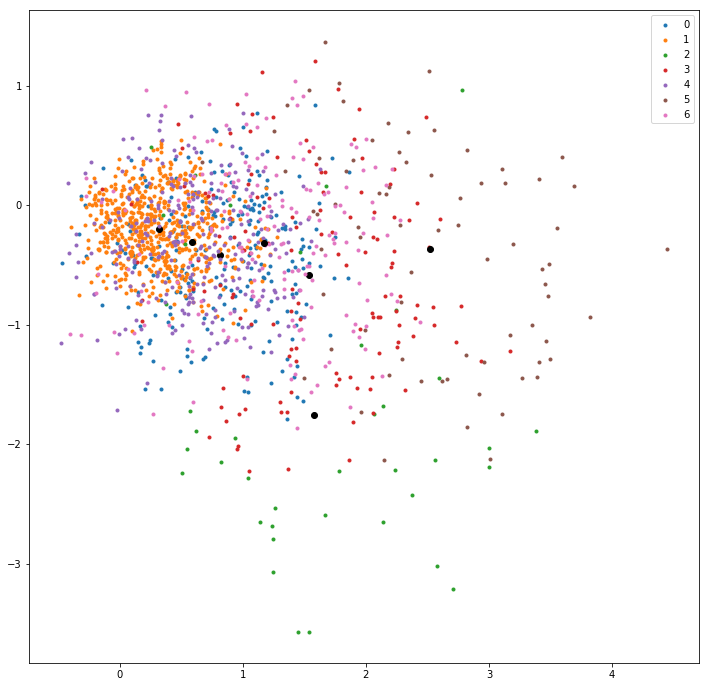

In [34]:
plotClusters(users, K_user, centroids)

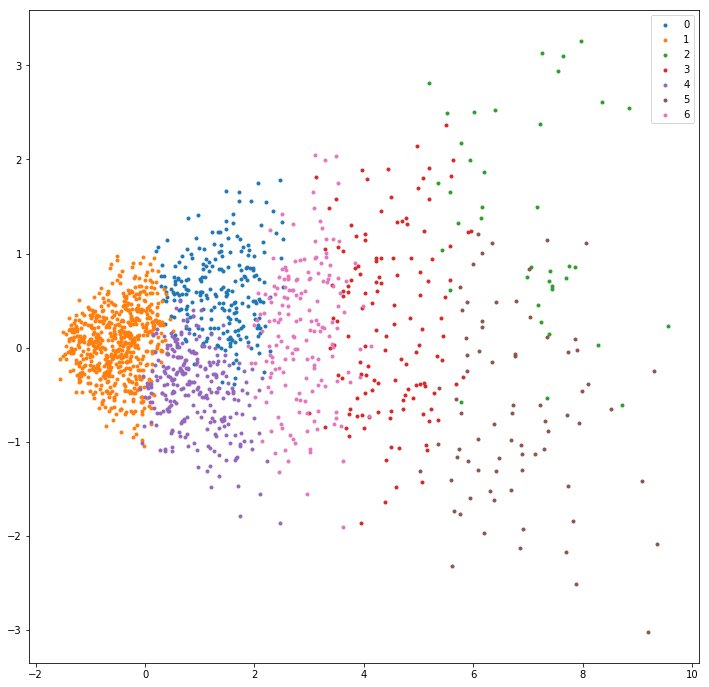

In [35]:
plotClusters(users, K_user, centroids, pcaComp=True)

In [36]:
users[['id','id_node','content','r1','r2','cluster']].to_csv('output/clustering_users_2.csv', index=None)

## 2. Tag features extraction and topics

Extract tag features and cluster them to define the topics

In [37]:
tags.drop(['type',0], axis=1, inplace=True)

c:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
tags.shape

(9201, 13)

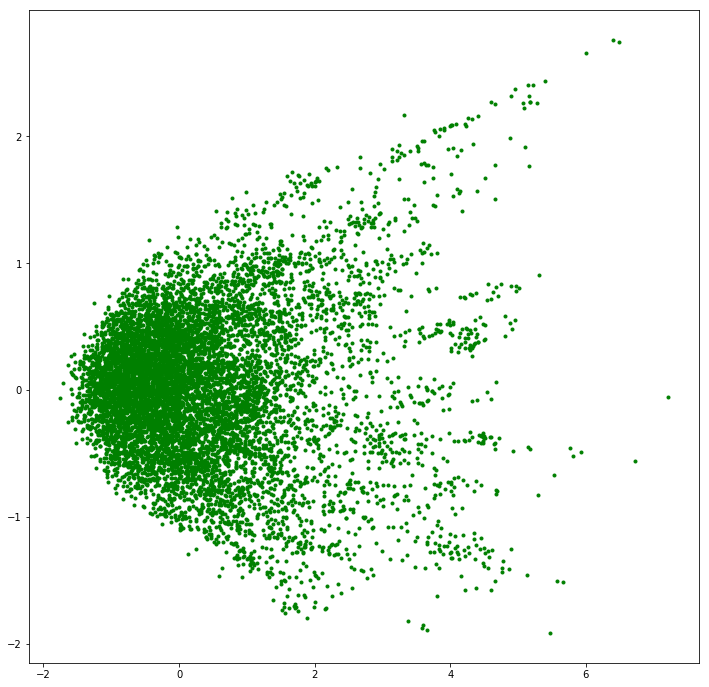

In [39]:
plt.figure(figsize=(12,12))
plt.scatter(tags['r1'], tags['r2'], marker='.', color='green')

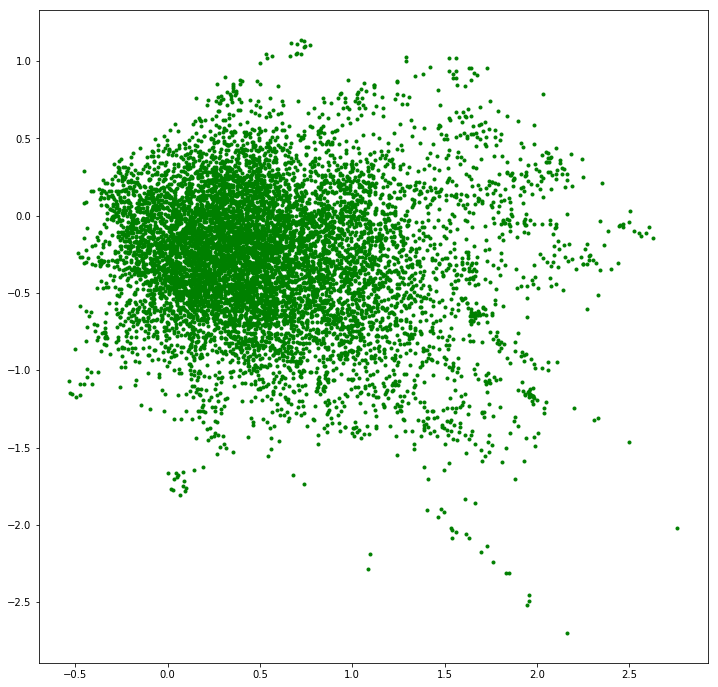

In [41]:
plt.figure(figsize=(12,12))
plt.scatter(tags[1], tags[2], marker='.', color='green')

In [42]:
K = range(2, 15)
s, i = getStructuralMetrics(tags[range(1,9)], K)

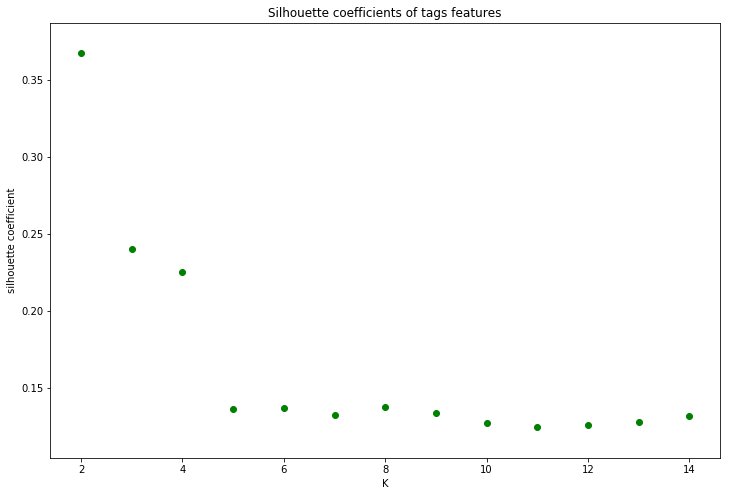

In [43]:
plt.figure(figsize=(12,8))
plt.title('Silhouette coefficients of tags features')
plt.xlabel('K')
plt.ylabel('silhouette coefficient')
plt.scatter(K, s, color='green')

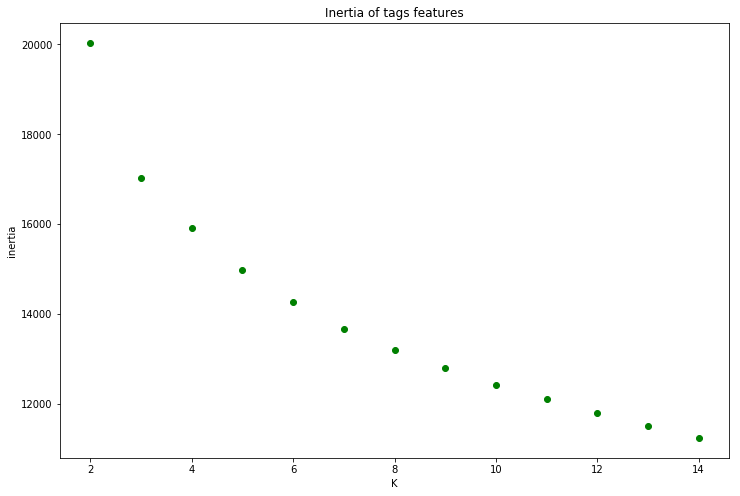

In [44]:
plt.figure(figsize=(12,8))
plt.title('Inertia of tags features')
plt.xlabel('K')
plt.ylabel('inertia')
plt.scatter(K, i, color='green')

In [45]:
K_tag = 5
kmeans = KMeans(n_clusters=K_tag, random_state=17, n_init=15, init='random').fit(tags[range(1,9)])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [46]:
tags['cluster'] = labels

c:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


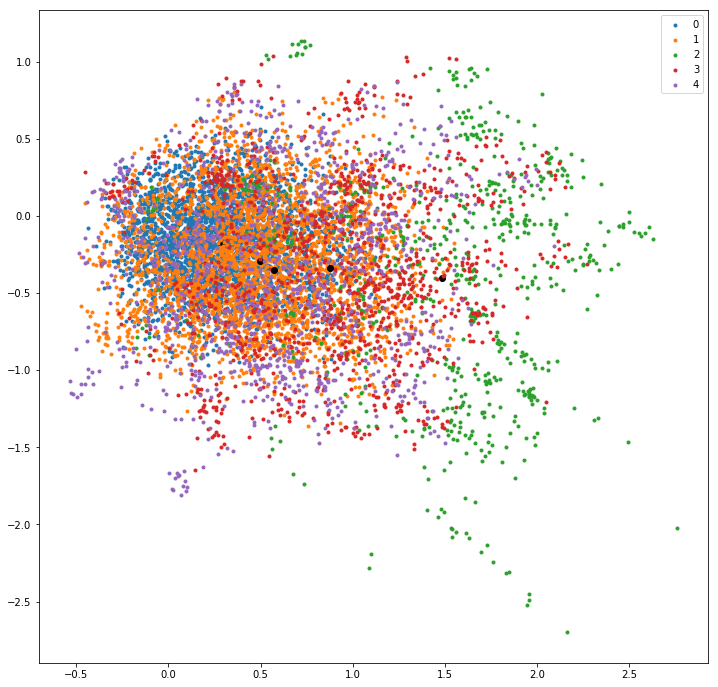

In [47]:
plotClusters(tags, K_tag, centroids)

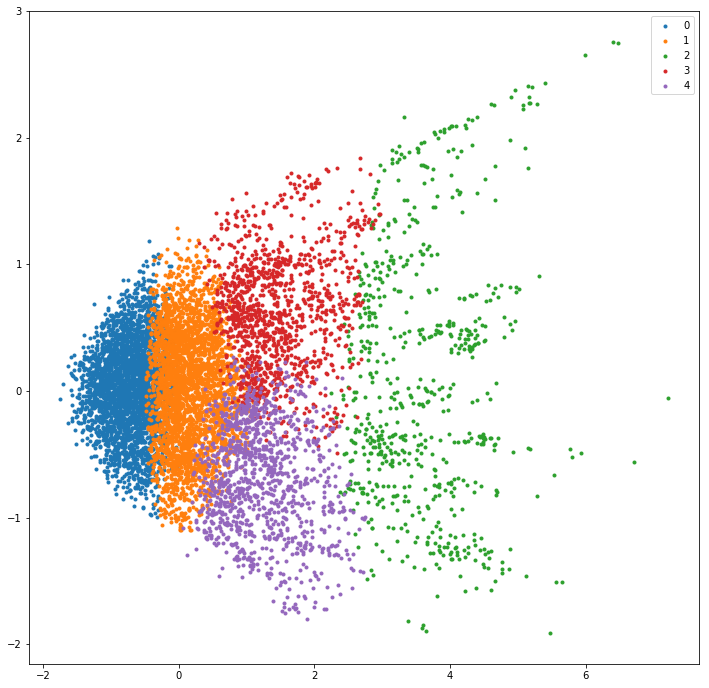

In [49]:
plotClusters(tags, K_tag, centroids, pcaComp=True)

In [51]:
with open('output/tags_clusters.txt', 'w') as outfile:
    for c in range(K_tag):
        cluster = tags[tags['cluster'] == c]
        
        outfile.write('Cluster {} - SIZE: {}\n'.format(c, cluster.shape[0]))
        outfile.write('\n'.join(list(cluster['content'])))
        outfile.write('\n')
        
        print c, cluster.shape[0]

0 3101
1 3090
2 668
3 1189
4 1153


In [54]:
# add indegree to each tag, in order to extract top 10 tags for each cluster
network = snap.LoadEdgeListNet('data/followers_network.csv', '\t')

In [55]:
r = []
for tid in list(tags['id']):
    tid = int(tid)
    NI = network.GetNI(tid)
    indeg = NI.GetInDeg()
    
    r.append(tuple((tid, indeg)))
result = pd.DataFrame(r, columns=['id', 'indegree'])

In [57]:
tags_out = tags[['id', 'content', 'cluster']].merge(result, on='id')
tags_out.head()

,id,content,cluster,indegree
0,224700,tasselearrings,1,4
1,224701,gxgcollective,4,515
2,224702,australianbrand,4,237
3,224703,wanderlust,0,1290
4,224706,turquoise,0,15


In [59]:
# print top10 hashtags by frequency for each cluster
for c in range(K_tag):
    cluster = tags_out[tags_out['cluster'] == c]
    top10 = cluster.sort_values(by='indegree', ascending=False)[:10]
    print 'Cluster {}'.format(c)
    print top10[['content', 'indegree']]

Cluster 0
         content  indegree
330  amalficoast      1530
265     handmade      1365
269  madeinitaly      1296
3     wanderlust      1290
473         food      1208
293  photography      1189
49      positano      1086
524         life      1046
249          nyc      1027
315         mood      1027
Cluster 1
               content  indegree
121     interiordesign      2134
1636        california      2017
273             design      1966
1777            foodie      1526
1049     travelblogger      1414
3970           toscana      1276
2163             amore      1228
1688               hat      1194
105             luxury      1190
51    lifestyleblogger      1105
Cluster 2
                 content  indegree
8247  thewearnecessities       841
7245           EdenBeing       579
8971            macasoul       538
5561      celebritystyle       465
8248        celebfashion       465
7073    celebrityfashion       462
6057          celebstyle       452
7747           Happiness      

## 3. Cluster posts using features and define user participation

Extract feature vector of each post, cluster them, check the top hashtags (by frequency and common) to highlight the topics and then compute a participation index for each user in each of these clusters